In [20]:
import numpy as np 
import matplotlib.pyplot as plt 

#Define a sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [21]:
#Loss function : Log Likelihood 
def compute_loss(y, hx):
    return -np.mean(y * np.log(hx) + (1+y ) * np.log(1-hx))


In [22]:
#Gradient of the loss
def compute_gradient(X,y,hx):
    return np.dot(X.T,(hx-y))/y.shape[0]

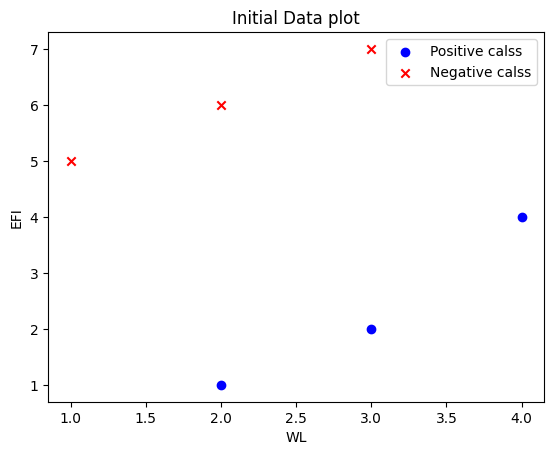

In [23]:
#Dataset
X=np.array([[2,1],[3,2],[4,4],[1,5],[2,6],[3,7]])
y=np.array([1,1,1,0,0,0])

#Plot intial data
plt.scatter(X[:3, 0],X[:3,1],color="blue",marker='o',label="Positive calss")
plt.scatter(X[3:, 0],X[3:,1],color="red",marker='x',label="Negative calss")
plt.xlabel("WL")
plt.ylabel("EFI")
plt.legend()
plt.title("Initial Data plot")
plt.show()

In [ ]:
def plot_decision_boundary1(X, y,weights,loss, iteration):
    plt.scatter(X[:3, 1],X[:3,2],color="blue",marker='o',label="Positive calss") if iteration== 0 else ""
    plt.scatter(X[3:, 1],X[3:,2],color="red",marker='x',label="Negative calss") if iteration== 0 else ""

    x_values = np.array([np.min(X[:,1]) - 1, np.max(X[:,1]) + 1])
    y_values = -(weights[0] + weights[1] * x_values / weights[2])
    plt.plot(x_values,y_values,"k")

    plt.xlim(x_values[0], x_values[1])
    plt.ylim(np.min(X[:, 2]) - 1, np.max(X[:, 2]) + 1)


    plt.xlabel("WL")
    plt.ylabel("EFI")
    plt.title(f"Decision Boundary at iteration at {iteration} \nLoss: {loss} ")
    if iteration == 0:
        plt.legend()
    plt.show()



In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, weights, loss, iteration):
    if iteration == 0:
        plt.scatter(X[:3, 1], X[:3, 2], color="blue", marker='o', label="Positive class")
        plt.scatter(X[3:, 1], X[3:, 2], color="red", marker='x', label="Negative class")
    else:
        plt.scatter(X[:3, 1], X[:3, 2], color="blue", marker='o')
        plt.scatter(X[3:, 1], X[3:, 2], color="red", marker='x')

    x_values = np.array([np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1])
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.plot(x_values, y_values, "k")

    plt.xlim(x_values[0], x_values[1])
    plt.ylim(np.min(X[:, 2]) - 1, np.max(X[:, 2]) + 1)

    plt.xlabel("WL")
    plt.ylabel("EFI")
    plt.title(f"Decision Boundary at iteration {iteration}\nLoss: {loss:.4f}")
    
    if iteration == 0:
        plt.legend()
    
    plt.show()

In [33]:
#logistic Regression model

def logistic_regression(X,y,learning_rate=0.1,num_iterations=10):
    #Add intercept term to X
    X = np.hstack((np.ones((X.shape[0],1)),X))

    #Initialize weights 
    weights= np.zeros(X.shape[1])

    for i in range(num_iterations):
        z= np.dot(X, weights)
        hx=sigmoid(z)
        loss=compute_loss(y,hx)
        gradient = compute_gradient(X,y,hx)
        weights -= learning_rate * gradient

        plot_decision_boundary(X,y,weights,loss,i)
        print(f'Iteration {i} : Theta={weights}, Loss={loss}')

    return weights

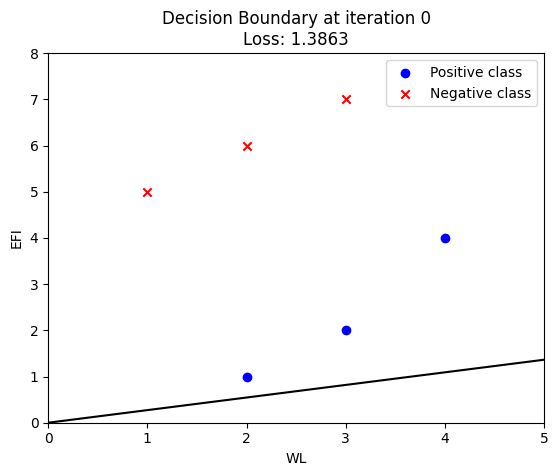

Iteration 0 : Theta=[ 0.          0.025      -0.09166667], Loss=1.3862943611198906


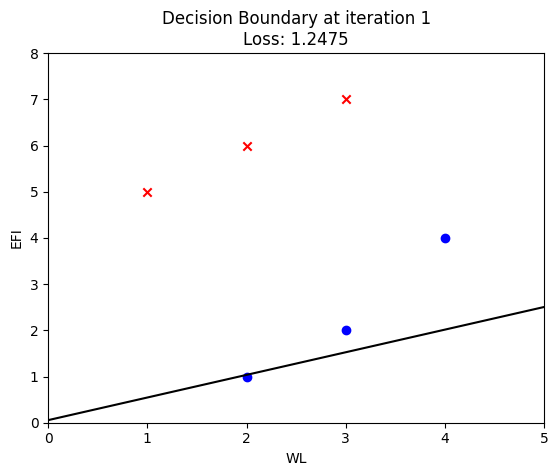

Iteration 1 : Theta=[ 0.00784781  0.06887779 -0.14060525], Loss=1.2474840765491955


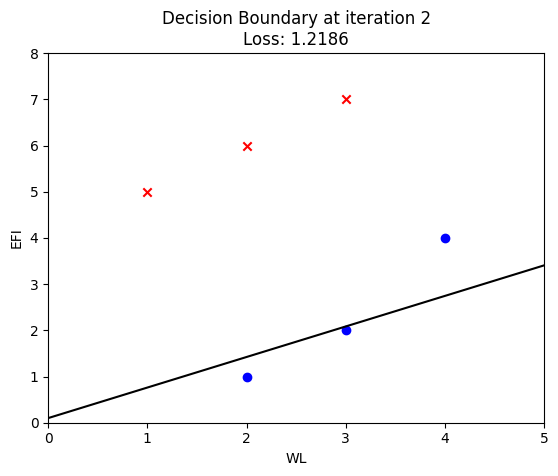

Iteration 2 : Theta=[ 0.01764134  0.11658362 -0.17629863], Loss=1.2185632632996724


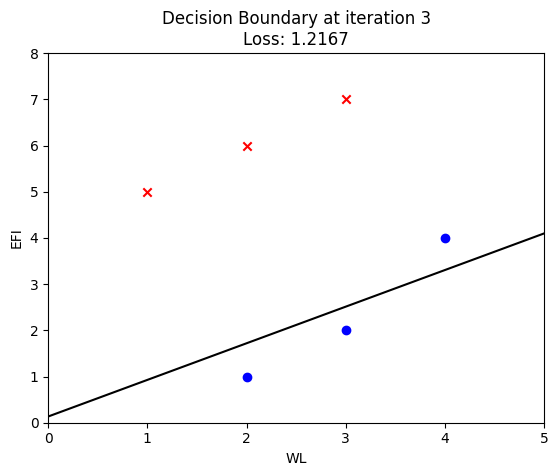

Iteration 3 : Theta=[ 0.02775584  0.16401158 -0.20689154], Loss=1.2167381591238475


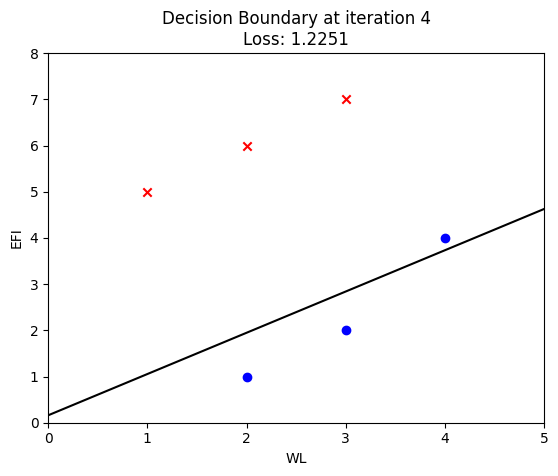

Iteration 4 : Theta=[ 0.03768945  0.20992896 -0.23499581], Loss=1.225095016560963


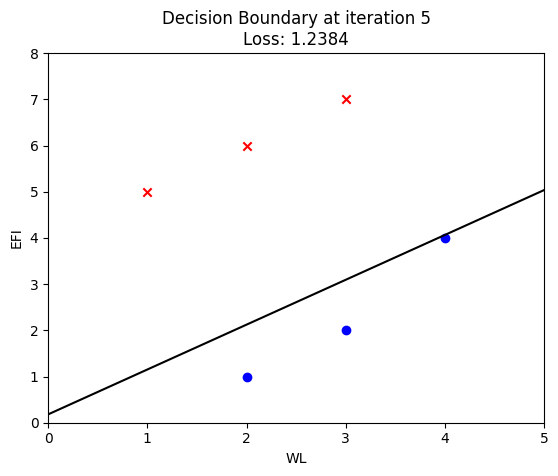

Iteration 5 : Theta=[ 0.04728565  0.25399034 -0.26154053], Loss=1.2384374854046263


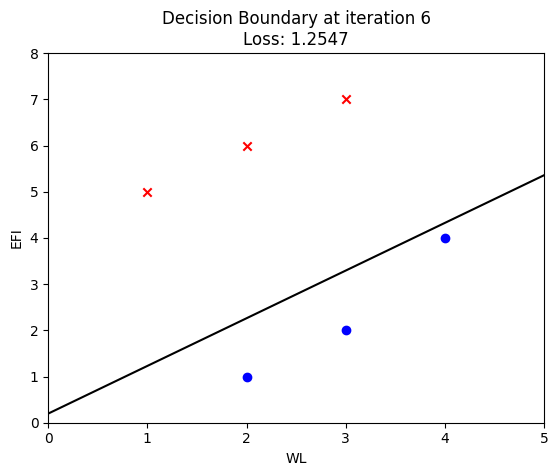

Iteration 6 : Theta=[ 0.0565048   0.29615111 -0.28688777], Loss=1.2547247421238412


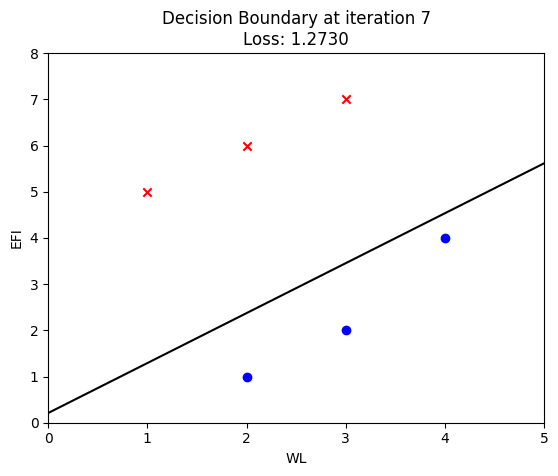

Iteration 7 : Theta=[ 0.06534809  0.33647087 -0.31119923], Loss=1.2729977139653337


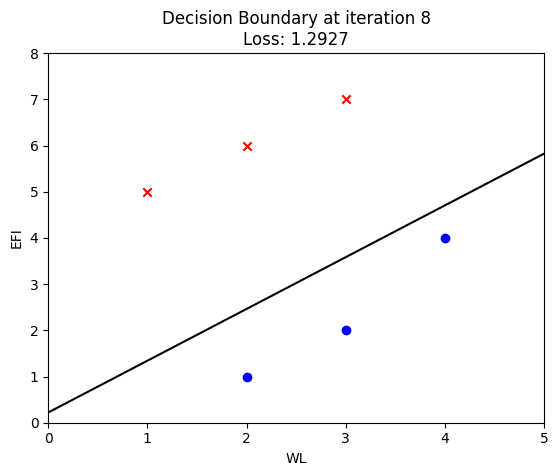

Iteration 8 : Theta=[ 0.07383072  0.37504349 -0.3345636 ], Loss=1.2927208778946115


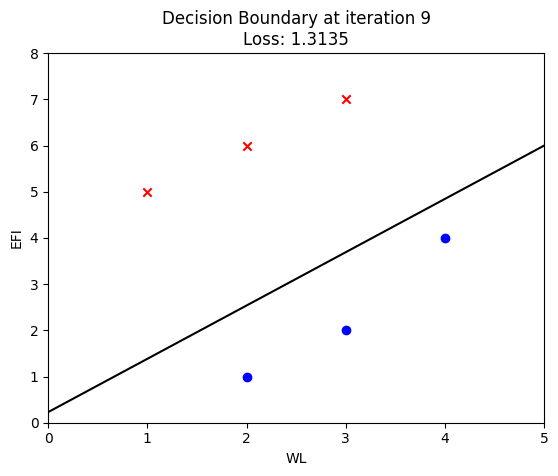

Iteration 9 : Theta=[ 0.08197221  0.41197135 -0.35704216], Loss=1.3135443845410004


In [34]:
weights = logistic_regression(X,y)